In [ ]:
## 22k-4080 ML Assignment 1

In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [2]:
import pandas as pd

df_adult = pd.concat([X,y], axis = 1)
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [5]:
y.head(10)

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


## Data preprocessing and splitting in train test split

In [10]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("Missing values:\n", X.isnull().sum())

for col in X.columns:
    if X[col].dtype == 'object':
        X[col].fillna(X[col].mode()[0], inplace=True)  # Fill categorical with mode
    else:
        X[col].fillna(X[col].median(), inplace=True)  # Fill numerical with median


categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

le_y = LabelEncoder()
y = le_y.fit_transform(y)  # 0 for <=50K, 1 for >50K

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)## Train-test split (80% train, 20% test)

print("Preprocessing complete.")

Missing values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64
Preprocessing complete.


C:\Users\ArhamKhan\AppData\Local\Temp\ipykernel_972\4070722564.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].median(), inplace=True)  # Fill numerical with median
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
import matplotlib.pyplot as plt

results = {
    'KNN': [],
    'Decision Tree': [],
    'Random Forest': [],
    'AdaBoost': [],
    'Stacking': []
}

def store_err_acc(model, name):
    accuracy = model.score(X_test, y_test)
    error = 1 - accuracy
    results[name].append((accuracy, error))
    return accuracy, error

# KNN

Accuracy for K=1: 0.4618
[[2938 1358  418  222]
 [1314  833  214  117]
 [ 476  213  595  278]
 [ 243  110  295  145]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.59      4936
           1       0.33      0.34      0.33      2478
           2       0.39      0.38      0.39      1562
           3       0.19      0.18      0.19       793

    accuracy                           0.46      9769
   macro avg       0.38      0.37      0.37      9769
weighted avg       0.46      0.46      0.46      9769



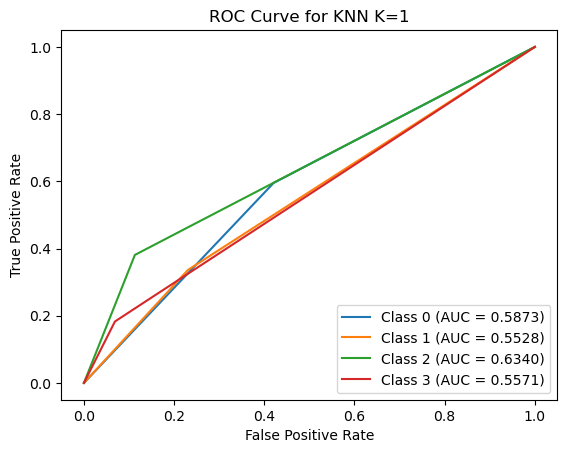

Accuracy for K=3: 0.4720
[[3118  947  532  339]
 [1438  611  255  174]
 [ 396  112  662  392]
 [ 194   61  318  220]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      4936
           1       0.35      0.25      0.29      2478
           2       0.37      0.42      0.40      1562
           3       0.20      0.28      0.23       793

    accuracy                           0.47      9769
   macro avg       0.38      0.39      0.38      9769
weighted avg       0.47      0.47      0.47      9769



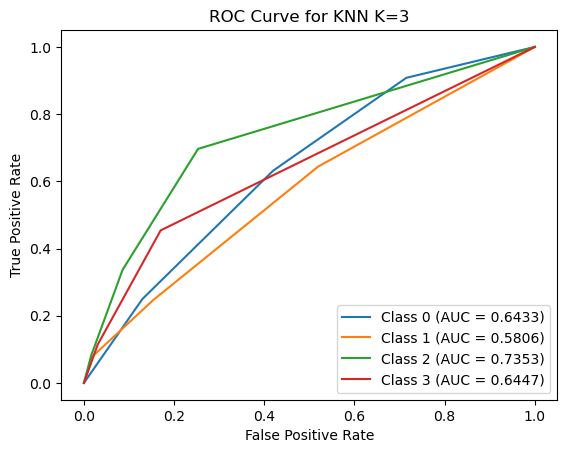

Accuracy for K=5: 0.4907
[[3296 1011  465  164]
 [1530  632  230   86]
 [ 416  166  723  257]
 [ 191   98  361  143]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      4936
           1       0.33      0.26      0.29      2478
           2       0.41      0.46      0.43      1562
           3       0.22      0.18      0.20       793

    accuracy                           0.49      9769
   macro avg       0.39      0.39      0.39      9769
weighted avg       0.47      0.49      0.48      9769



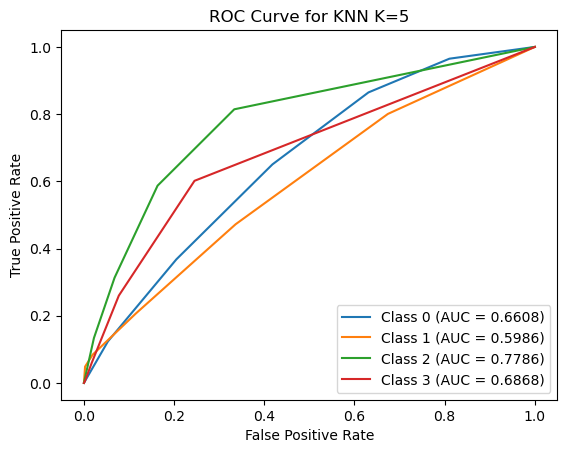

Accuracy for K=7: 0.5109
[[3583  804  393  156]
 [1648  551  202   77]
 [ 479  109  753  221]
 [ 234   84  371  104]]
              precision    recall  f1-score   support

           0       0.60      0.73      0.66      4936
           1       0.36      0.22      0.27      2478
           2       0.44      0.48      0.46      1562
           3       0.19      0.13      0.15       793

    accuracy                           0.51      9769
   macro avg       0.40      0.39      0.39      9769
weighted avg       0.48      0.51      0.49      9769



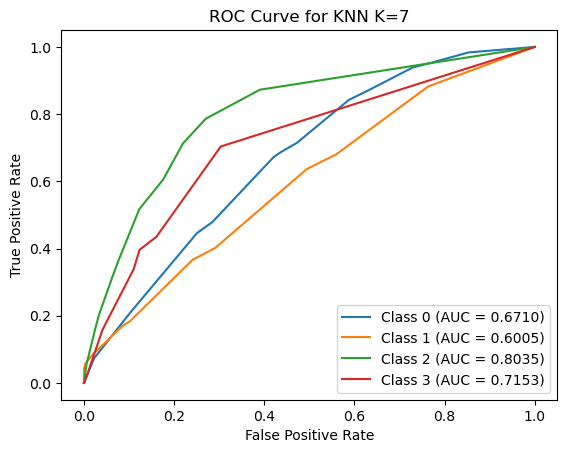

Accuracy for K=9: 0.5223
[[3730  688  418  100]
 [1717  508  198   55]
 [ 501  104  772  185]
 [ 254   71  376   92]]
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      4936
           1       0.37      0.21      0.26      2478
           2       0.44      0.49      0.46      1562
           3       0.21      0.12      0.15       793

    accuracy                           0.52      9769
   macro avg       0.41      0.39      0.39      9769
weighted avg       0.49      0.52      0.49      9769



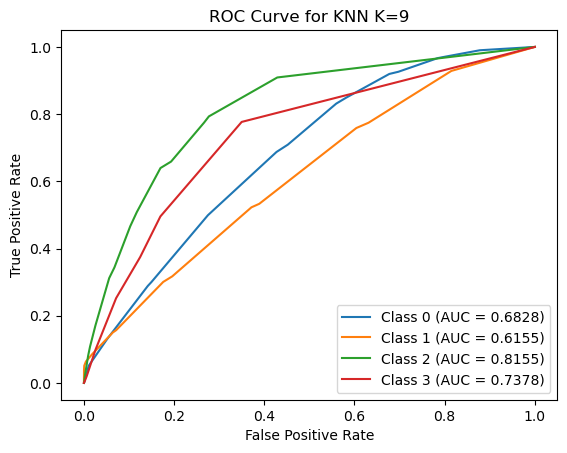

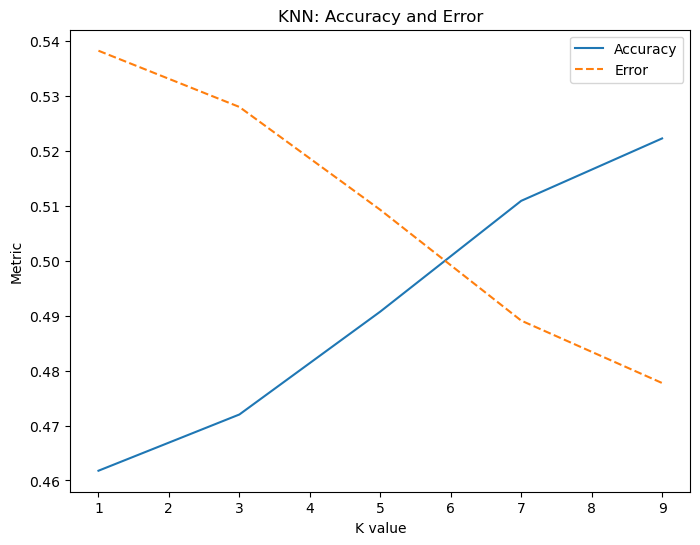

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])## Binarizing the output labels for ROC curve (there are 4 actual classes)

k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k))
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy, error = store_err_acc(knn, 'KNN')



    accuracy = knn.score(X_test, y_test)
    print(f"Accuracy for K={k}: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    y_prob = knn.predict_proba(X_test)
    for i in range(y_binarized.shape[1]):
        fpr, tpr, _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for KNN K={k}')
    plt.legend(loc='lower right')
    plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_values, [acc for acc, err in results['KNN']], label='Accuracy')
plt.plot(k_values, [err for acc, err in results['KNN']], label='Error', linestyle='--')
plt.xlabel('K value')
plt.ylabel('Metric')
plt.title('KNN: Accuracy and Error')
plt.legend(loc='best')
plt.show()

# Cross- Validation for KNN

In [50]:
from sklearn.model_selection import cross_val_score

k_values = [1, 3, 5, 7, 9]
cv_results_knn = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    mean_error = 1 - mean_accuracy
    cv_results_knn[k] = {'accuracy': mean_accuracy, 'error': mean_error}

    print(f"KNN (k={k}) - Cross-Validation Mean Accuracy: {mean_accuracy:.4f}, Mean Error: {mean_error:.4f}")

KNN (k=1) - Cross-Validation Mean Accuracy: 0.4651, Mean Error: 0.5349
KNN (k=3) - Cross-Validation Mean Accuracy: 0.5046, Mean Error: 0.4954
KNN (k=5) - Cross-Validation Mean Accuracy: 0.5217, Mean Error: 0.4783
KNN (k=7) - Cross-Validation Mean Accuracy: 0.5309, Mean Error: 0.4691
KNN (k=9) - Cross-Validation Mean Accuracy: 0.5395, Mean Error: 0.4605


# Decision Tree

Accuracy for max_depth=5: 0.5855
[[4700    0  235    1]
 [2171  203  102    2]
 [ 755    0  801    6]
 [ 372   18  387   16]]
              precision    recall  f1-score   support

           0       0.59      0.95      0.73      4936
           1       0.92      0.08      0.15      2478
           2       0.53      0.51      0.52      1562
           3       0.64      0.02      0.04       793

    accuracy                           0.59      9769
   macro avg       0.67      0.39      0.36      9769
weighted avg       0.67      0.59      0.49      9769

Accuracy for max_depth=10: 0.5827
[[4630   38  246   22]
 [2126  213  120   19]
 [ 688   14  803   57]
 [ 322   30  395   46]]
              precision    recall  f1-score   support

           0       0.60      0.94      0.73      4936
           1       0.72      0.09      0.15      2478
           2       0.51      0.51      0.51      1562
           3       0.32      0.06      0.10       793

    accuracy                           0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


Accuracy for max_depth=15: 0.5621
[[4330  179  343   84]
 [1978  273  176   51]
 [ 548   56  767  191]
 [ 262   50  360  121]]
              precision    recall  f1-score   support

           0       0.61      0.88      0.72      4936
           1       0.49      0.11      0.18      2478
           2       0.47      0.49      0.48      1562
           3       0.27      0.15      0.20       793

    accuracy                           0.56      9769
   macro avg       0.46      0.41      0.39      9769
weighted avg       0.53      0.56      0.50      9769

Skipping ROC curve for class 0 due to NaN values in predicted probabilities.
Skipping ROC curve for class 1 due to NaN values in predicted probabilities.
Skipping ROC curve for class 2 due to NaN values in predicted probabilities.
Skipping ROC curve for class 3 due to NaN values in predicted probabilities.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


Accuracy for max_depth=None: 0.3768
[[1996 1288  378 1274]
 [ 832  795  202  649]
 [ 222  139  534  667]
 [ 101   85  251  356]]
              precision    recall  f1-score   support

           0       0.63      0.40      0.49      4936
           1       0.34      0.32      0.33      2478
           2       0.39      0.34      0.36      1562
           3       0.12      0.45      0.19       793

    accuracy                           0.38      9769
   macro avg       0.37      0.38      0.35      9769
weighted avg       0.48      0.38      0.41      9769

Skipping ROC curve for class 0 due to NaN values in predicted probabilities.
Skipping ROC curve for class 1 due to NaN values in predicted probabilities.
Skipping ROC curve for class 2 due to NaN values in predicted probabilities.
Skipping ROC curve for class 3 due to NaN values in predicted probabilities.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


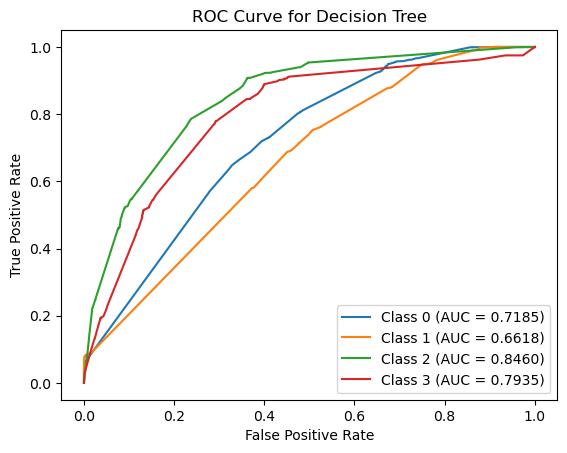

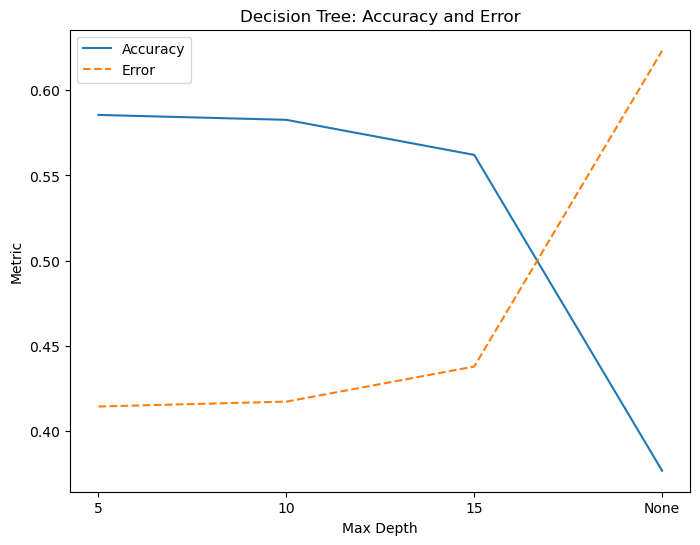

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

tree_depths = [5, 10, 15, None]  ## different depths (ROC Curve worked only for depth =5 , on other values it has NAN problem)
for depth in tree_depths:
    dt = OneVsRestClassifier(DecisionTreeClassifier(max_depth=depth, random_state=42))
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy, error = store_err_acc(dt, 'Decision Tree')

    accuracy = dt.score(X_test, y_test)
    print(f"Accuracy for max_depth={depth}: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # ROC-AUC curve for each class
    y_prob = dt.predict_proba(X_test)

    for i in range(y_binarized.shape[1]):
        if np.isnan(y_prob[:, i]).any():
            print(f"Skipping ROC curve for class {i} due to NaN values in predicted probabilities.")
            continue
        
        fpr, tpr, _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
depths_labels = ['5', '10', '15', 'None']
plt.plot(depths_labels, [acc for acc, err in results['Decision Tree']], label='Accuracy')
plt.plot(depths_labels, [err for acc, err in results['Decision Tree']], label='Error', linestyle='--')
plt.xlabel('Max Depth')
plt.ylabel('Metric')
plt.title('Decision Tree: Accuracy and Error')
plt.legend(loc='best')
plt.show()

# Cross- Validation for Decision tree

In [51]:
cv_results_dt = {}
tree_depths = [5, 10, 15, None]  # Different tree depths

for depth in tree_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    mean_error = 1 - mean_accuracy
    cv_results_dt[depth] = {'accuracy': mean_accuracy, 'error': mean_error}

    print(f"Decision Tree (max_depth={depth}) - Cross-Validation Mean Accuracy: {mean_accuracy:.4f}, Mean Error: {mean_error:.4f}")


Decision Tree (max_depth=5) - Cross-Validation Mean Accuracy: 0.5838, Mean Error: 0.4162
Decision Tree (max_depth=10) - Cross-Validation Mean Accuracy: 0.5854, Mean Error: 0.4146
Decision Tree (max_depth=15) - Cross-Validation Mean Accuracy: 0.5751, Mean Error: 0.4249
Decision Tree (max_depth=None) - Cross-Validation Mean Accuracy: 0.4770, Mean Error: 0.5230


# Random Forest

Accuracy for 50 trees: 0.5548
[[4027  526  313   70]
 [1819  474  153   32]
 [ 490  101  835  136]
 [ 253   56  400   84]]
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      4936
           1       0.41      0.19      0.26      2478
           2       0.49      0.53      0.51      1562
           3       0.26      0.11      0.15       793

    accuracy                           0.55      9769
   macro avg       0.44      0.41      0.41      9769
weighted avg       0.51      0.55      0.51      9769



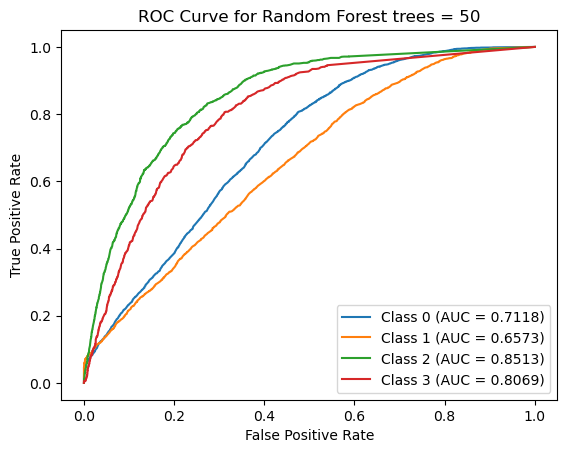

Accuracy for 100 trees: 0.5601
[[4112  456  307   61]
 [1857  443  150   28]
 [ 500   93  843  126]
 [ 254   57  408   74]]
              precision    recall  f1-score   support

           0       0.61      0.83      0.71      4936
           1       0.42      0.18      0.25      2478
           2       0.49      0.54      0.52      1562
           3       0.26      0.09      0.14       793

    accuracy                           0.56      9769
   macro avg       0.45      0.41      0.40      9769
weighted avg       0.52      0.56      0.51      9769



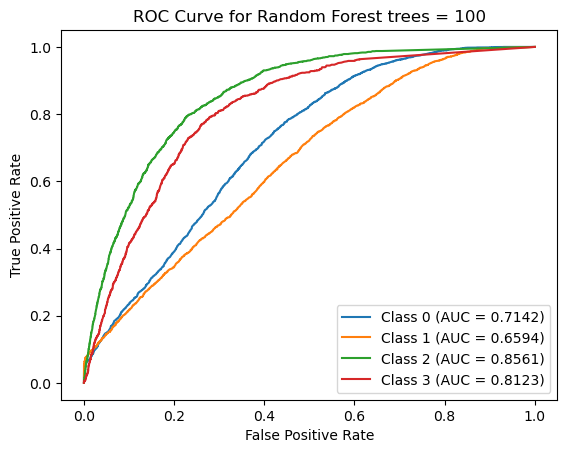

Accuracy for 200 trees: 0.5613
[[4140  444  291   61]
 [1875  425  148   30]
 [ 509   90  847  116]
 [ 256   55  411   71]]
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      4936
           1       0.42      0.17      0.24      2478
           2       0.50      0.54      0.52      1562
           3       0.26      0.09      0.13       793

    accuracy                           0.56      9769
   macro avg       0.45      0.41      0.40      9769
weighted avg       0.52      0.56      0.51      9769



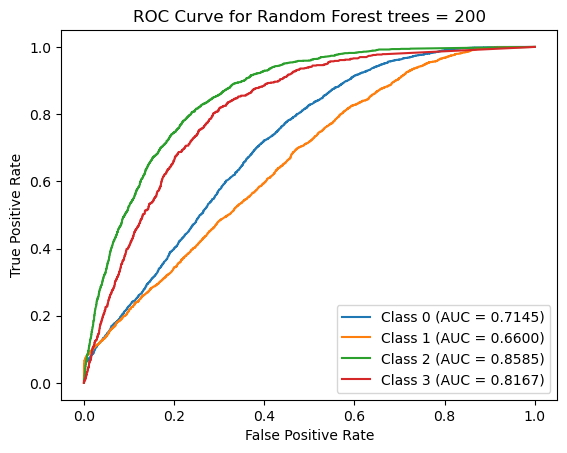

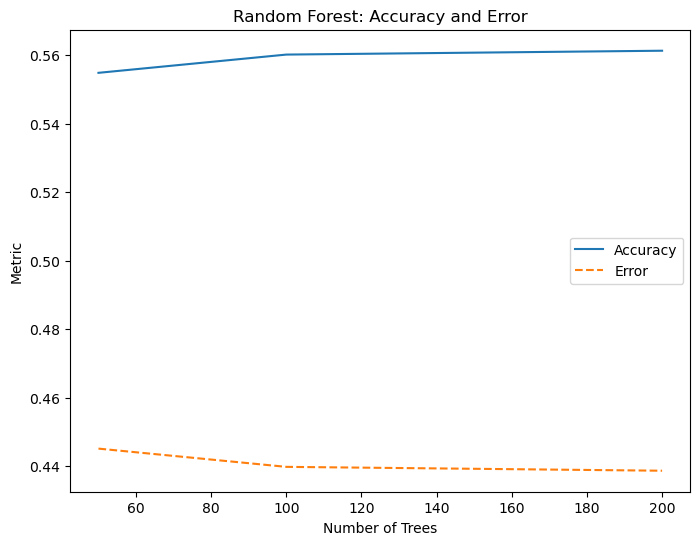

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import numpy as np

y_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

n_trees = [50, 100, 200]
for n in n_trees:
    rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=n, random_state=42))
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy, error = store_err_acc(rf, 'Random Forest')

    accuracy = rf.score(X_test, y_test)
    print(f"Accuracy for {n} trees: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    
    y_prob = rf.predict_proba(X_test)# ROC-AUC curve (turning values into probabilities)
    for i in range(y_binarized.shape[1]):
        if np.isnan(y_prob[:, i]).any():
            print(f"Skipping ROC curve for class {i} due to NaN values in predicted probabilities.")
            continue
        
        fpr, tpr, _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Random Forest trees = {n}')
    plt.legend(loc='lower right')
    plt.show()

plt.figure(figsize=(8, 6))
plt.plot(n_trees, [acc for acc, err in results['Random Forest']], label='Accuracy')
plt.plot(n_trees, [err for acc, err in results['Random Forest']], label='Error', linestyle='--')
plt.xlabel('Number of Trees')
plt.ylabel('Metric')
plt.title('Random Forest: Accuracy and Error')
plt.legend(loc='best')
plt.show()


# Cross- Validation for Random Forest

In [52]:
cv_results_rf = {}
n_trees = [50, 100, 200]

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    mean_error = 1 - mean_accuracy
    cv_results_rf[n] = {'accuracy': mean_accuracy, 'error': mean_error}

    print(f"Random Forest (n_estimators={n}) - Cross-Validation Mean Accuracy: {mean_accuracy:.4f}, Mean Error: {mean_error:.4f}")


Random Forest (n_estimators=50) - Cross-Validation Mean Accuracy: 0.5575, Mean Error: 0.4425
Random Forest (n_estimators=100) - Cross-Validation Mean Accuracy: 0.5612, Mean Error: 0.4388
Random Forest (n_estimators=200) - Cross-Validation Mean Accuracy: 0.5639, Mean Error: 0.4361


# AdaBoost

Accuracy for 50 estimators: 59.39%
[[4724    1  211    0]
 [2158  213  104    3]
 [ 712    0  849    1]
 [ 351   21  405   16]]
              precision    recall  f1-score   support

           0       0.59      0.96      0.73      4936
           1       0.91      0.09      0.16      2478
           2       0.54      0.54      0.54      1562
           3       0.80      0.02      0.04       793

    accuracy                           0.59      9769
   macro avg       0.71      0.40      0.37      9769
weighted avg       0.68      0.59      0.50      9769



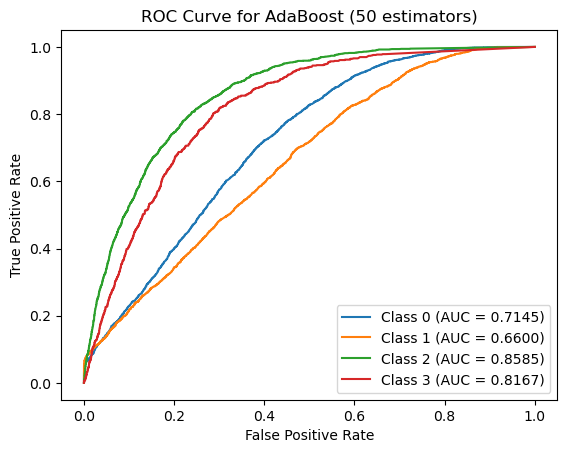

Accuracy for 100 estimators: 59.68%
[[4724    0  212    0]
 [2150  213  112    3]
 [ 683    0  877    2]
 [ 321   22  434   16]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      4936
           1       0.91      0.09      0.16      2478
           2       0.54      0.56      0.55      1562
           3       0.76      0.02      0.04       793

    accuracy                           0.60      9769
   macro avg       0.70      0.41      0.37      9769
weighted avg       0.68      0.60      0.50      9769



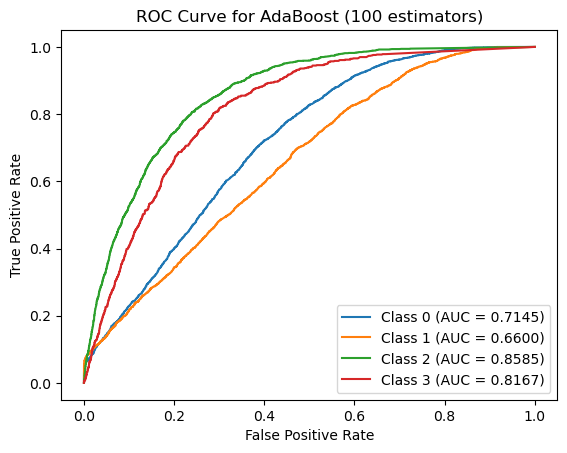

Accuracy for 200 estimators: 59.71%
[[4715    3  218    0]
 [2150  213  111    4]
 [ 670    0  888    4]
 [ 320   22  434   17]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      4936
           1       0.89      0.09      0.16      2478
           2       0.54      0.57      0.55      1562
           3       0.68      0.02      0.04       793

    accuracy                           0.60      9769
   macro avg       0.68      0.41      0.37      9769
weighted avg       0.67      0.60      0.50      9769



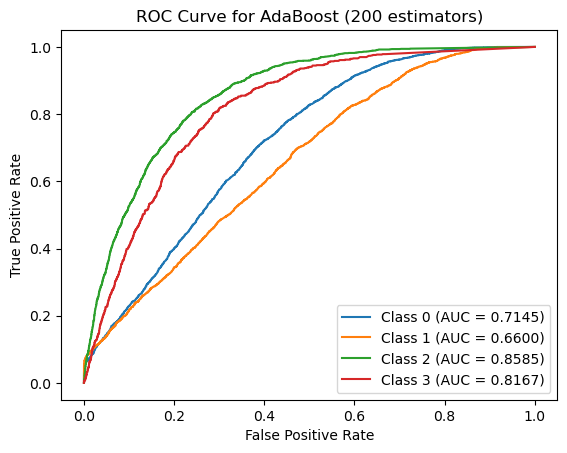

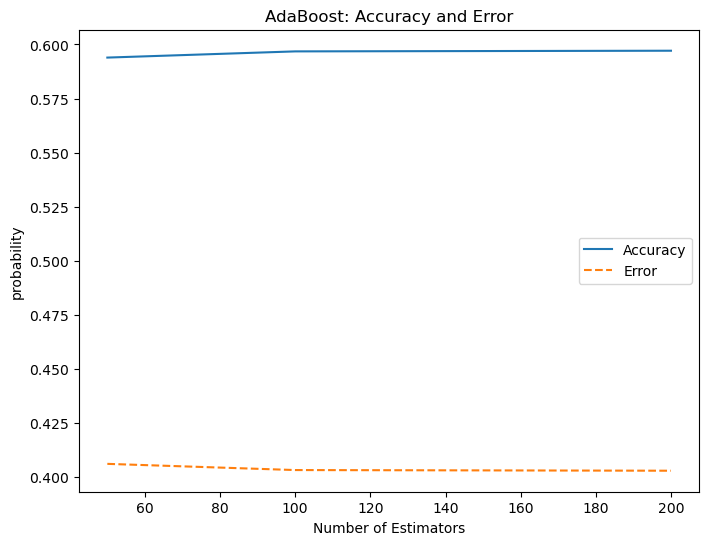

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import numpy as np

y_binarized = label_binarize(y_test, classes=[0,1,2,3])

ada_estimators = [50, 100, 200]
for n in ada_estimators:
    ab = OneVsRestClassifier( AdaBoostClassifier(n_estimators=n, random_state=42) )
    ab.fit(X_train, y_train)
    y_pred = ab.predict(X_test)
    accuracy, error = store_err_acc(ab, 'AdaBoost')

    accuracy = ab.score(X_test, y_test)
    print(f"Accuracy for {n} estimators: {accuracy*100:.2f}%")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    y_prob = rf.predict_proba(X_test)
    for i in range(y_binarized.shape[1]):
        if np.isnan(y_prob[:, i]).any():
            print(f"Skipping ROC curve for class {i} due to NaN values in predicted probabilities.")
            continue
        
        fpr, tpr, _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for AdaBoost ({n} estimators)')
    plt.legend(loc='lower right')
    plt.show()

plt.figure(figsize=(8, 6))
plt.plot(ada_estimators, [acc for acc, err in results['AdaBoost']], label='Accuracy')
plt.plot(ada_estimators, [err for acc, err in results['AdaBoost']], label='Error', linestyle='--')
plt.xlabel('Number of Estimators')
plt.ylabel('probability')
plt.title('AdaBoost: Accuracy and Error')
plt.legend(loc='best')
plt.show()

# Cross- Validation for AdaBoost

In [53]:
cv_results_ab = {}
ada_estimators = [50, 100, 200]

for n in ada_estimators:
    ab = AdaBoostClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(ab, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    mean_error = 1 - mean_accuracy
    cv_results_ab[n] = {'accuracy': mean_accuracy, 'error': mean_error}

    print(f"AdaBoost (n_estimators={n}) - Cross-Validation Mean Accuracy: {mean_accuracy:.4f}, Mean Error: {mean_error:.4f}")

AdaBoost (n_estimators=50) - Cross-Validation Mean Accuracy: 0.5960, Mean Error: 0.4040
AdaBoost (n_estimators=100) - Cross-Validation Mean Accuracy: 0.5921, Mean Error: 0.4079
AdaBoost (n_estimators=200) - Cross-Validation Mean Accuracy: 0.5918, Mean Error: 0.4082


# Stacking

Accuracy for Stacking: 58.89

[[4606   27  302    1]
 [2121  206  151    0]
 [ 610   11  941    0]
 [ 310   15  468    0]]
              precision    recall  f1-score   support

           0       0.60      0.93      0.73      4936
           1       0.80      0.08      0.15      2478
           2       0.51      0.60      0.55      1562
           3       0.00      0.00      0.00       793

    accuracy                           0.59      9769
   macro avg       0.48      0.40      0.36      9769
weighted avg       0.59      0.59      0.50      9769



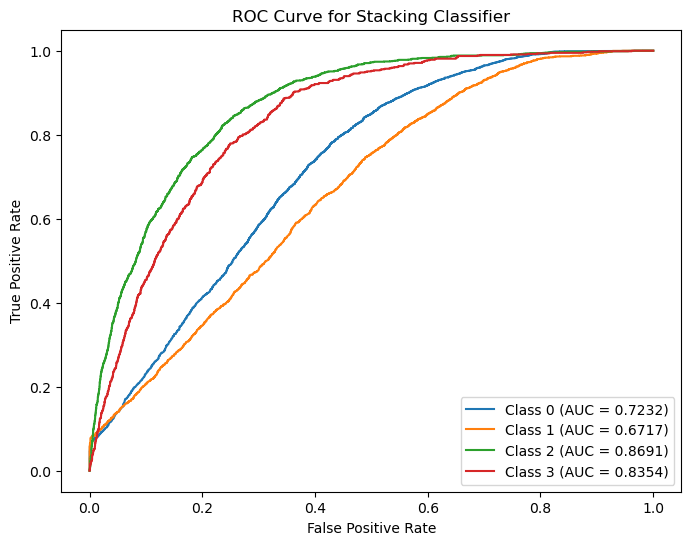

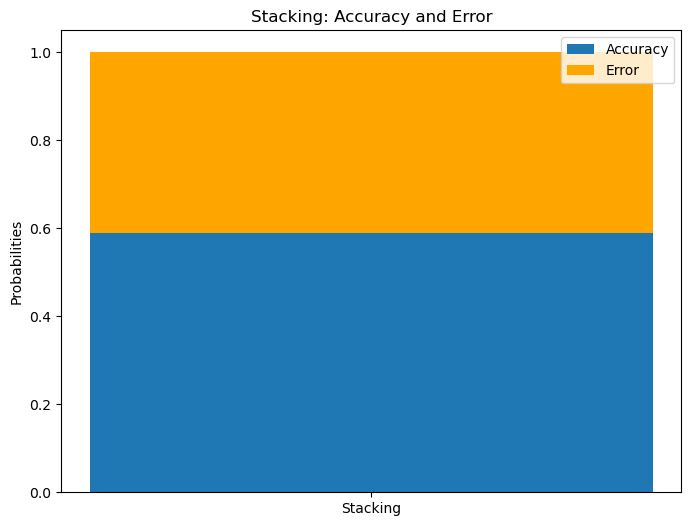

In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

y_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=10)
rf = RandomForestClassifier(n_estimators=100)
meta_learner_layer = LogisticRegression()

stack = StackingClassifier(estimators=[('knn', knn), ('dt', dt), ('rf', rf)], final_estimator=meta_learner_layer)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
accuracy, error = store_err_acc(stack, 'Stacking')  #collecting accuracy and error to report best technique

accuracy = stack.score(X_test, y_test)
print(f"Accuracy for Stacking: {accuracy * 100:.2f}\n")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_prob = stack.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(y_binarized.shape[1]):
    if np.isnan(y_prob[:, i]).any():
        print(f"Skipping ROC curve for class {i} due to NaN values in predicted probabilities.")
        continue
    
    fpr, tpr, _ = roc_curve(y_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(['Stacking'], [acc for acc, err in results['Stacking']], label='Accuracy')
plt.bar(['Stacking'], [err for acc, err in results['Stacking']], label='Error', bottom=[acc for acc, err in results['Stacking']], color='orange')
plt.ylabel('Probabilities')
plt.title('Stacking: Accuracy and Error')
plt.legend(loc='best')
plt.show()

# Cross- Validation for stacking

In [56]:
cv_results_stack = {}

knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=10)
rf = RandomForestClassifier(n_estimators=100)

meta_model = LogisticRegression()
stack = StackingClassifier(estimators=[('knn', knn), ('dt', dt), ('rf', rf)], final_estimator=meta_model)

cv_scores = cross_val_score(stack, X_train, y_train, cv=5, scoring='accuracy') ##5-folds
mean_accuracy = cv_scores.mean()
mean_error = 1 - mean_accuracy
cv_results_stack = {'accuracy': mean_accuracy, 'error': mean_error}

print(f"Stacking - Cross-Validation Mean Accuracy: {mean_accuracy:.4f}, Mean Error: {mean_error:.4f}")

Stacking - Cross-Validation Mean Accuracy: 0.5928, Mean Error: 0.4072


# Best Performing Technique

In [48]:
best_technique = None
best_accuracy = 0
for technique, metrics in results.items():
    max_acc = max([acc for acc, err in metrics])
    if max_acc > best_accuracy:
        best_accuracy = max_acc
        best_technique = technique

print(f'The best performing technique is:\n {best_technique} with an accuracy of {best_accuracy:.4f}')


The best performing technique is:
 AdaBoost with an accuracy of 0.5971
